<a href="https://colab.research.google.com/github/atr3002/Binary-Classification-Framework/blob/main/MLTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1: Exploratory Data Analysis

In [2]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

Step 1: Data Loading and Initial Exploration

In [3]:
# Download dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# Exact filename
print(os.listdir(path))

# Load the CSV
df = pd.read_csv(os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv"))

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [9]:
# 1.1 Dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}\n")

# 1.2 First 5 rows
print(f"{df.head()}\n")

# 1.3 Dataset information
print(df.info())

Rows: 7043, Columns: 21

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMo

Step 2: Data Quality Assessment

In [7]:
# 2.1 Missing values analysis
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
# 2.2 Duplicate records
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [10]:
# 2.3 Data type verification
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [11]:
# 2.4 Checking for special values
print(f"'TotalCharges' unique values count: {df['TotalCharges'].nunique()}")
print("Sample of 'TotalCharges':", df['TotalCharges'].unique()[:10])

'TotalCharges' unique values count: 6531
Sample of 'TotalCharges': ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']


Step 3: Data Cleaning

In [12]:
# Convert TotalCharges to numeric (create NaN for non-numeric)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
# After converting TotalCharges to numeric
print(f"Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

Missing values in TotalCharges: 11


In [14]:
missing_records = df[df['TotalCharges'].isnull()]

# All 11 records with missing "TotalCharges"

# Show only the columns needed
simple_view = missing_records[['customerID', 'TotalCharges', 'Churn']]

print(simple_view)

      customerID  TotalCharges Churn
488   4472-LVYGI           NaN    No
753   3115-CZMZD           NaN    No
936   5709-LVOEQ           NaN    No
1082  4367-NUYAO           NaN    No
1340  1371-DWPAZ           NaN    No
3331  7644-OMVMY           NaN    No
3826  3213-VVOLG           NaN    No
4380  2520-SGTTA           NaN    No
5218  2923-ARZLG           NaN    No
6670  4075-WKNIU           NaN    No
6754  2775-SEFEE           NaN    No


In [15]:
# Calculate statistics by churn group
print("\nStatistics by Churn Status:")
stats_by_churn = df.groupby('Churn')['TotalCharges'].agg(['mean', 'median', 'count'])
print(stats_by_churn)
print()

# Calculate overall mean and median for "TotalCharges"
mean_value = df['TotalCharges'].mean()
median_value = df['TotalCharges'].median()
print("TotalCharges Statistics:")
print(f"Mean:  {mean_value:,.2f}, Median: {median_value:,.2f}")


Statistics by Churn Status:
              mean   median  count
Churn                             
No     2555.344141  1683.60   5163
Yes    1531.796094   703.55   1869

TotalCharges Statistics:
Mean:  2,283.30, Median: 1,397.47


In [20]:
# Calculate median for non-churned customers
non_churned_median = df[df['Churn'] == 'No']['TotalCharges'].median()

df['TotalCharges'] = df.apply(lambda row: non_churned_median if pd.isna(row['TotalCharges']) else row['TotalCharges'],axis=1)

imputed_records = df[df['TotalCharges'] == non_churned_median]

print(imputed_records[['customerID', 'TotalCharges', 'Churn']])

print(f"\nMissing values after imputation: {df['TotalCharges'].isnull().sum()}")

      customerID  TotalCharges Churn
488   4472-LVYGI        1683.6    No
753   3115-CZMZD        1683.6    No
936   5709-LVOEQ        1683.6    No
1082  4367-NUYAO        1683.6    No
1340  1371-DWPAZ        1683.6    No
2062  7996-MHXLW        1683.6    No
3331  7644-OMVMY        1683.6    No
3826  3213-VVOLG        1683.6    No
4380  2520-SGTTA        1683.6    No
5218  2923-ARZLG        1683.6    No
6670  4075-WKNIU        1683.6    No
6754  2775-SEFEE        1683.6    No

Missing values after imputation: 0


In [21]:
# Create a copy for analysis
df_clean = df.copy()

Step 4: Target Variable Analysis (Churn)

In [22]:
# 4.1 Churn distribution
churn_counts = df_clean['Churn'].value_counts()
churn_percentage = df_clean['Churn'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Count': churn_counts,'Percentage': churn_percentage}))

       Count  Percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


Step 5: Numerical Features Analysis

In [25]:
# Identify numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(f"\n5.1 Numerical Columns: {numerical_cols}")


5.1 Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']



5.2 Statistical Summary:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2282.363808
std      24.559481       30.090047   2265.124074
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1400.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000



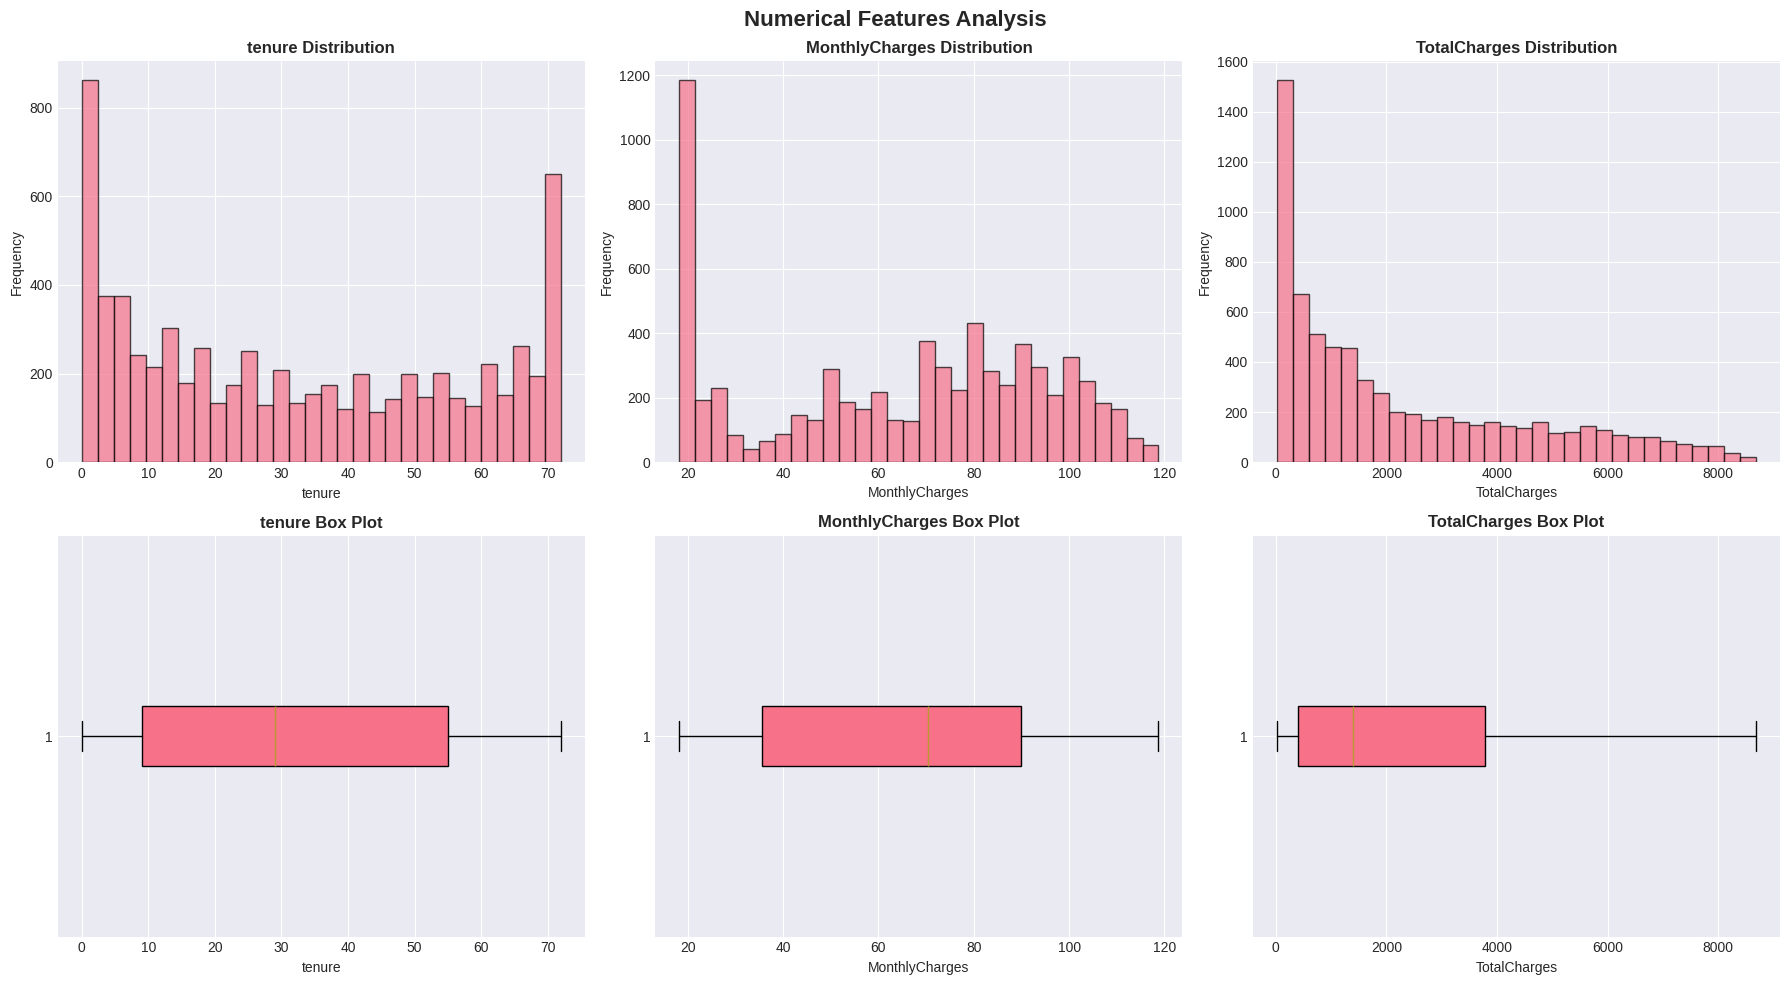

In [31]:
print("\n5.2 Statistical Summary:")
print(f"{df_clean[numerical_cols].describe()}\n")

# Visualization of numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Numerical Features Analysis', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    # Histogram
    axes[0, idx].hist(df_clean[col], bins=30, edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[0, idx].set_xlabel(col)
    axes[0, idx].set_ylabel('Frequency')

    # Box plot
    axes[1, idx].boxplot(df_clean[col], vert=False, patch_artist=True)
    axes[1, idx].set_title(f'{col} Box Plot', fontsize=12, fontweight='bold')
    axes[1, idx].set_xlabel(col)

plt.tight_layout()
plt.show()


5.3 Correlation Analysis:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.247900      0.825257
MonthlyCharges  0.247900        1.000000      0.650753
TotalCharges    0.825257        0.650753      1.000000



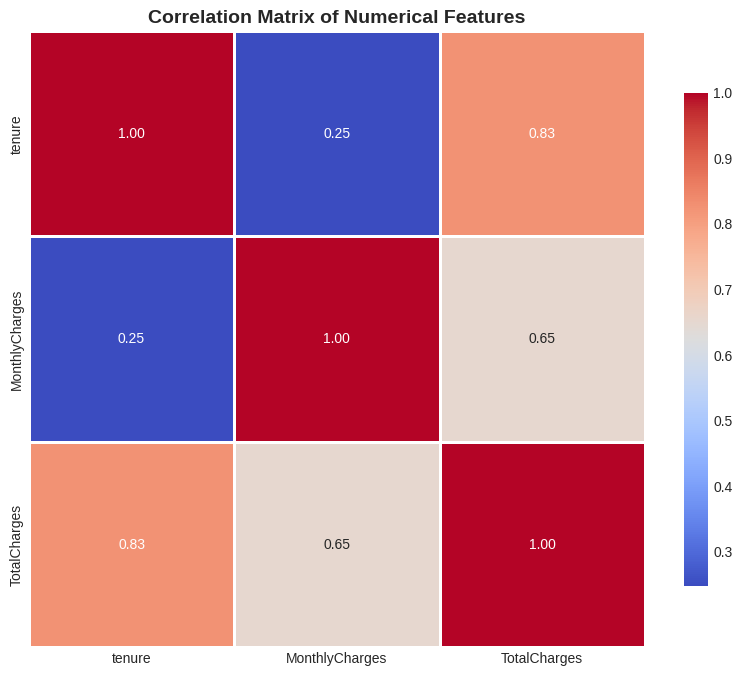

In [33]:
print("\n5.3 Correlation Analysis:")
correlation_matrix = df_clean[numerical_cols].corr()
print(f"{correlation_matrix}\n")

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            square=True, cbar_kws={'shrink': 0.8}, linewidths=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.show()

Step 6: Categorical Features Analysis

In [34]:
# Identify categorical columns (excluding customerID and Churn)
categorical_cols = [col for col in df_clean.columns
                    if df_clean[col].dtype == 'object' and col not in ['customerID', 'Churn']]

print(f"\n6.1 Categorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   - {col}: {df_clean[col].nunique()} unique values")


6.1 Categorical Columns (15):
   - gender: 2 unique values
   - Partner: 2 unique values
   - Dependents: 2 unique values
   - PhoneService: 2 unique values
   - MultipleLines: 3 unique values
   - InternetService: 3 unique values
   - OnlineSecurity: 3 unique values
   - OnlineBackup: 3 unique values
   - DeviceProtection: 3 unique values
   - TechSupport: 3 unique values
   - StreamingTV: 3 unique values
   - StreamingMovies: 3 unique values
   - Contract: 3 unique values
   - PaperlessBilling: 2 unique values
   - PaymentMethod: 4 unique values



6.2 Key Categorical Features Distribution:


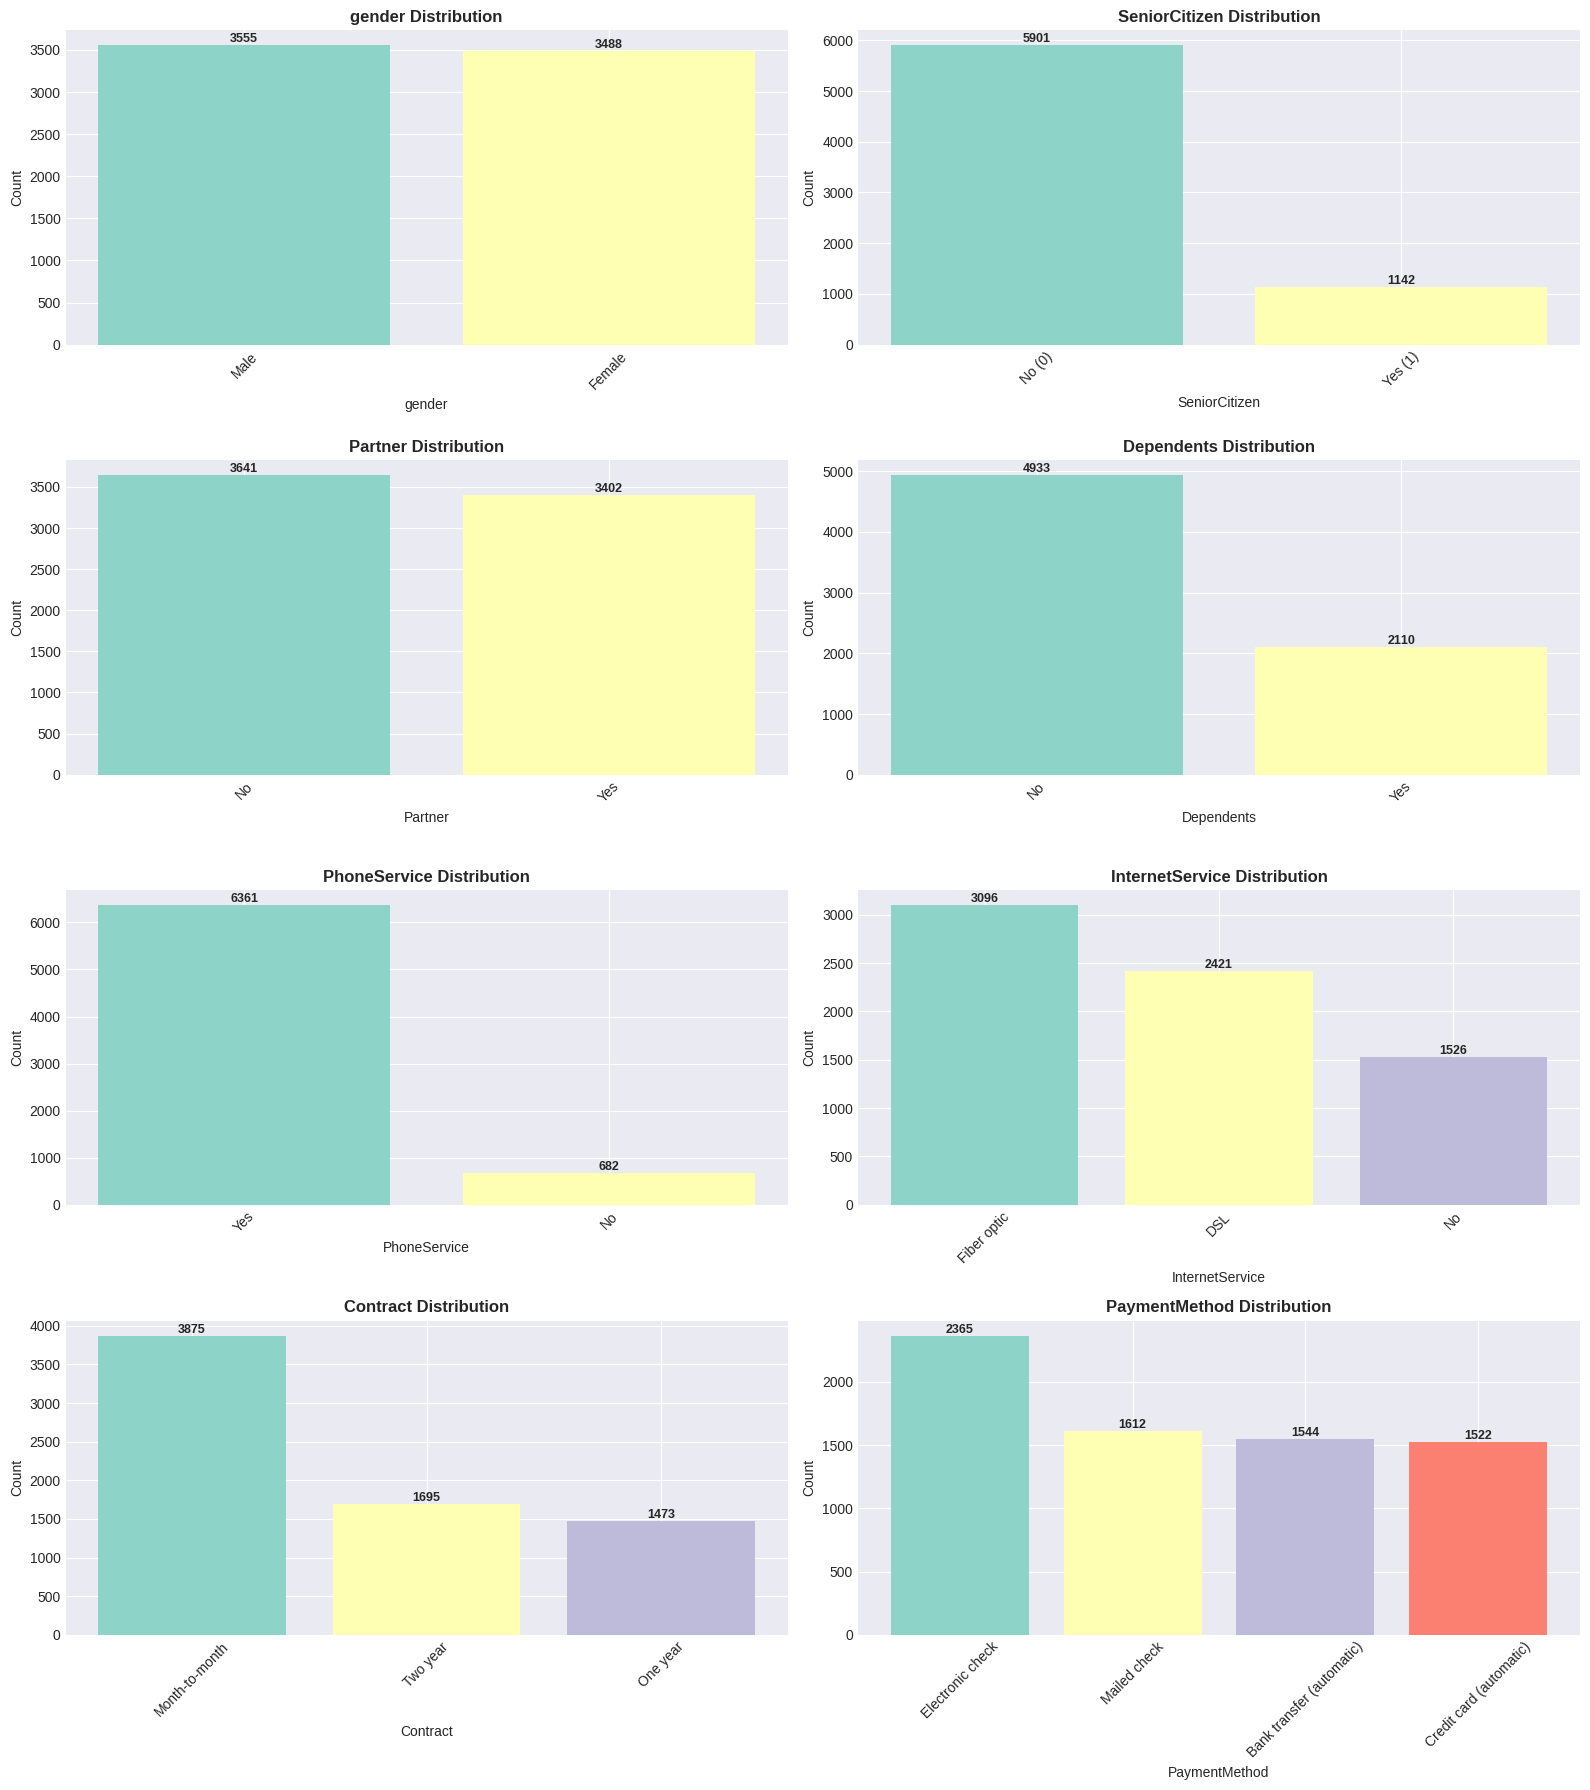

In [35]:
# Select key categorical features for detailed analysis
key_categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'PhoneService', 'InternetService', 'Contract', 'PaymentMethod']

print("\n6.2 Key Categorical Features Distribution:")

# Visualize categorical distributions
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

for idx, col in enumerate(key_categorical):
    if col == 'SeniorCitizen':  # This is numerical in dataset
        counts = df_clean[col].value_counts()
        labels = ['No (0)', 'Yes (1)']
    else:
        counts = df_clean[col].value_counts()
        labels = counts.index

    axes[idx].bar(labels, counts.values, color=plt.cm.Set3(np.arange(len(counts))))
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

    # Add count labels on bars
    for i, v in enumerate(counts.values):
        axes[idx].text(i, v + max(counts.values)*0.01, str(v),
                      ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Step 7: Relationship with Churn


7.1 Churn Rate by Numerical Features:


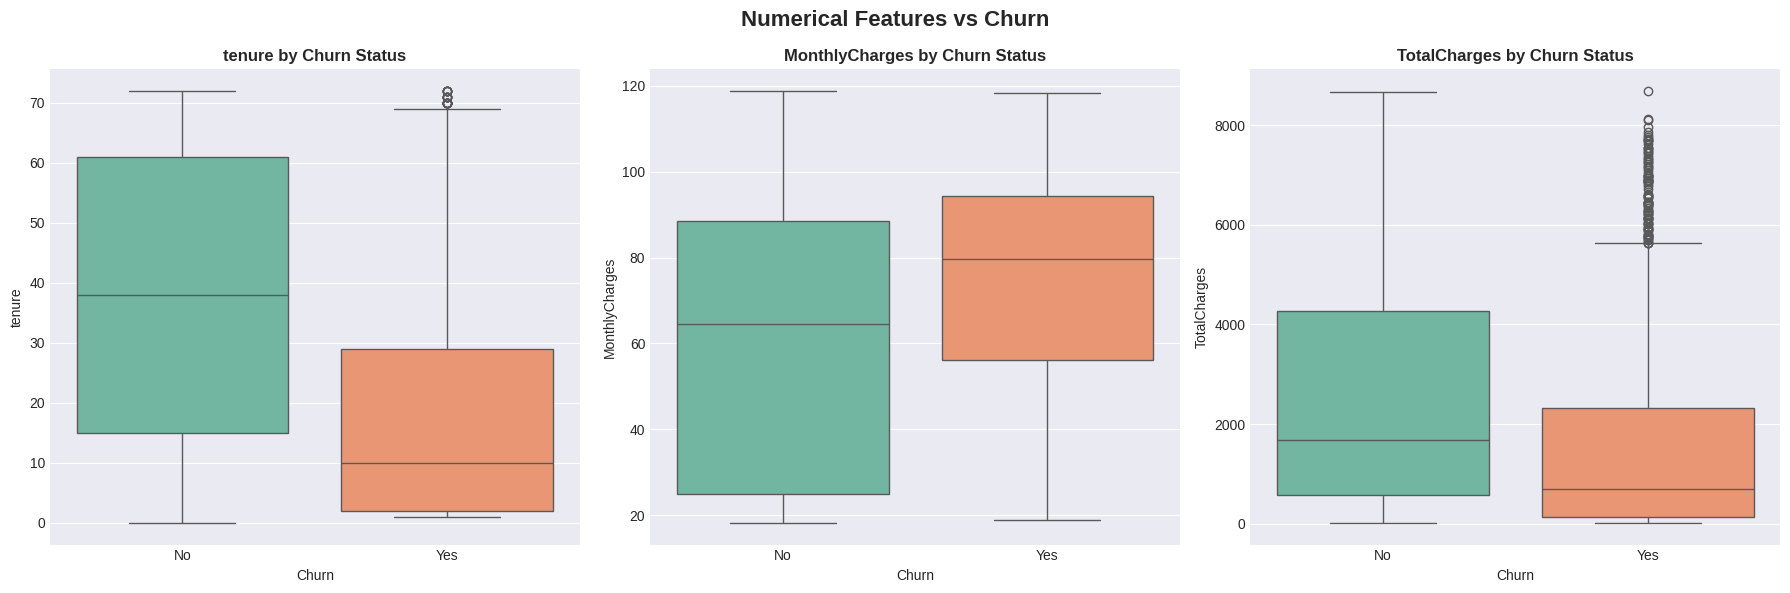

In [36]:
print("\n7.1 Churn Rate by Numerical Features:")

# Create subplots for numerical features vs churn
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Numerical Features vs Churn', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    # Box plot
    sns.boxplot(x='Churn', y=col, data=df_clean, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} by Churn Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Churn')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

In [37]:
# Calculate statistics
print("\n7.2 Statistical Comparison (Mean Values):")
churn_stats = df_clean.groupby('Churn')[numerical_cols].mean()
print(churn_stats)


7.2 Statistical Comparison (Mean Values):
          tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.569965       61.265124   2553.490800
Yes    17.979133       74.441332   1531.796094



7.3 Churn Rate by Key Categorical Features:


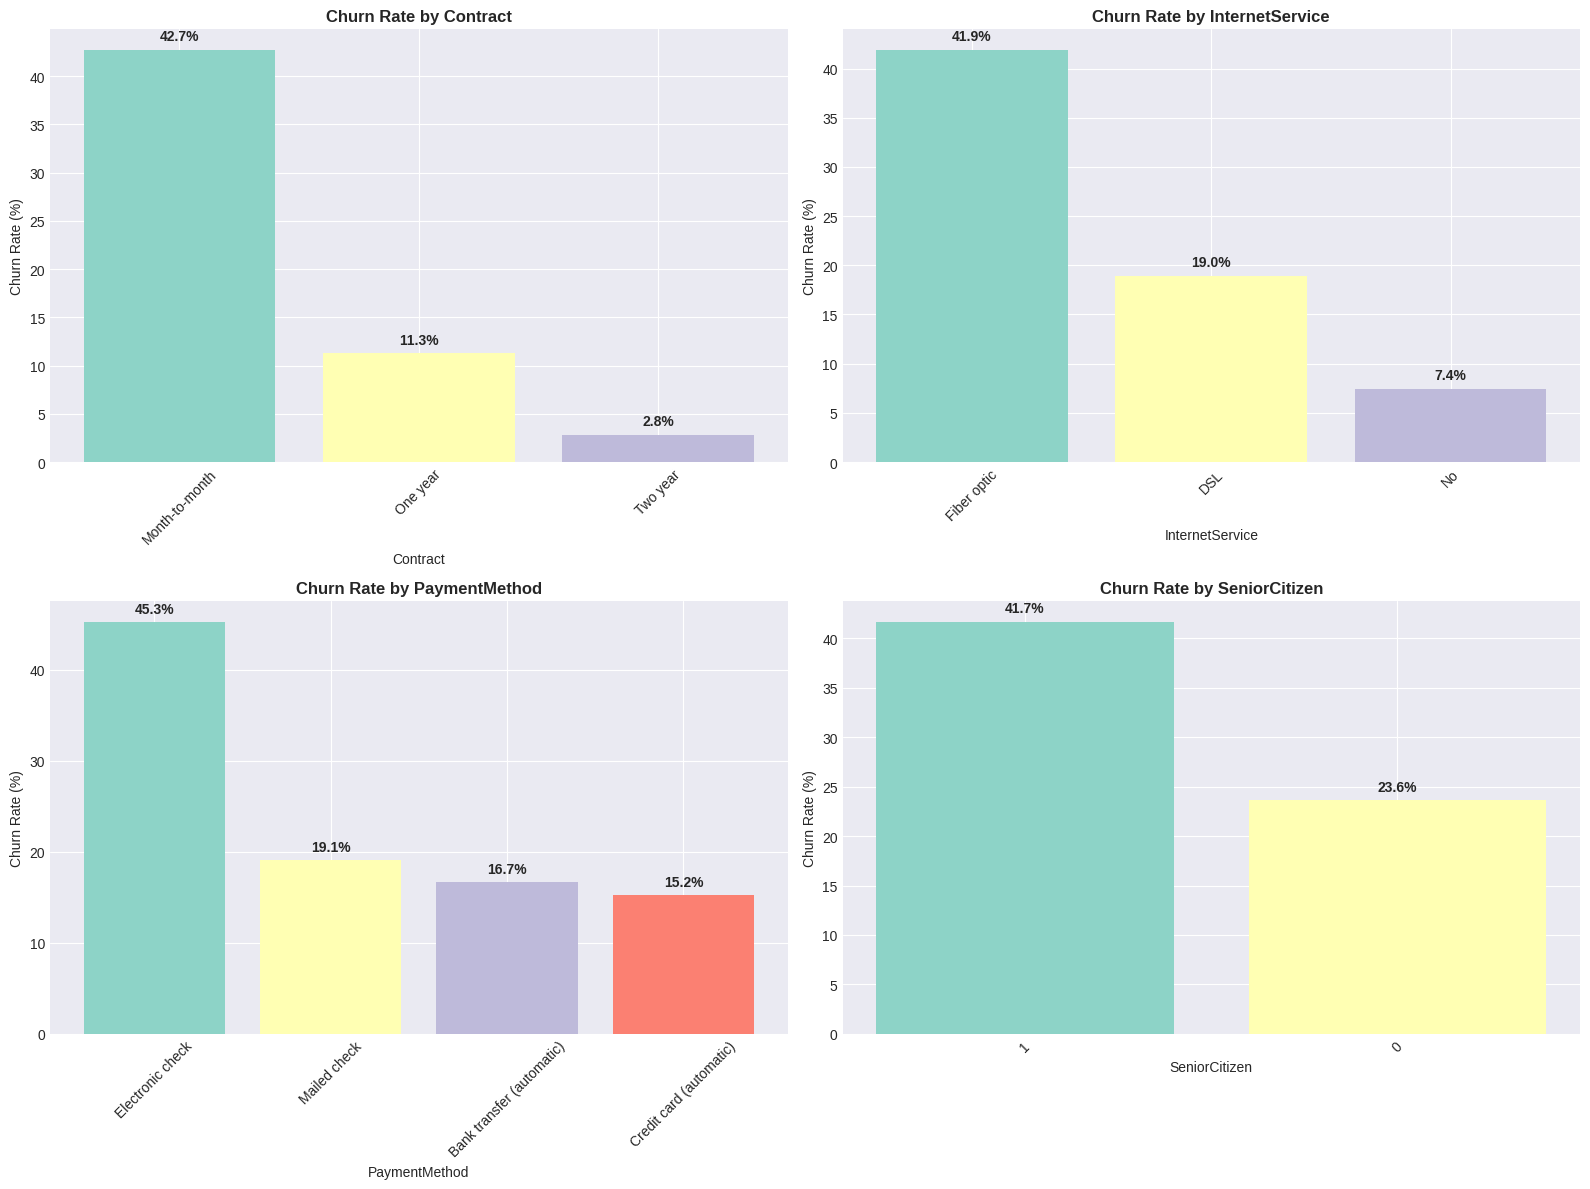

In [38]:
print("\n7.3 Churn Rate by Key Categorical Features:")

# Select top categorical features for churn analysis
top_categorical = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(top_categorical):
    # Calculate churn rate for each category
    churn_rate = df_clean.groupby(col)['Churn'].value_counts(normalize=True).unstack()

    if churn_rate.shape[1] == 2:  # Both Yes and No present
        churn_rate['ChurnRate'] = churn_rate['Yes'] * 100
        churn_rate = churn_rate.sort_values('ChurnRate', ascending=False)

        # Plot
        bars = axes[idx].bar(churn_rate.index.astype(str), churn_rate['ChurnRate'],
                            color=plt.cm.Set3(np.arange(len(churn_rate))))
        axes[idx].set_title(f'Churn Rate by {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Churn Rate (%)')
        axes[idx].tick_params(axis='x', rotation=45)

        # Add percentage labels
        for i, v in enumerate(churn_rate['ChurnRate']):
            axes[idx].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*60)
print("STEP 8: ADVANCED VISUALIZATIONS")
print("="*60)


STEP 8: ADVANCED VISUALIZATIONS



8.1 Tenure vs Monthly Charges by Churn


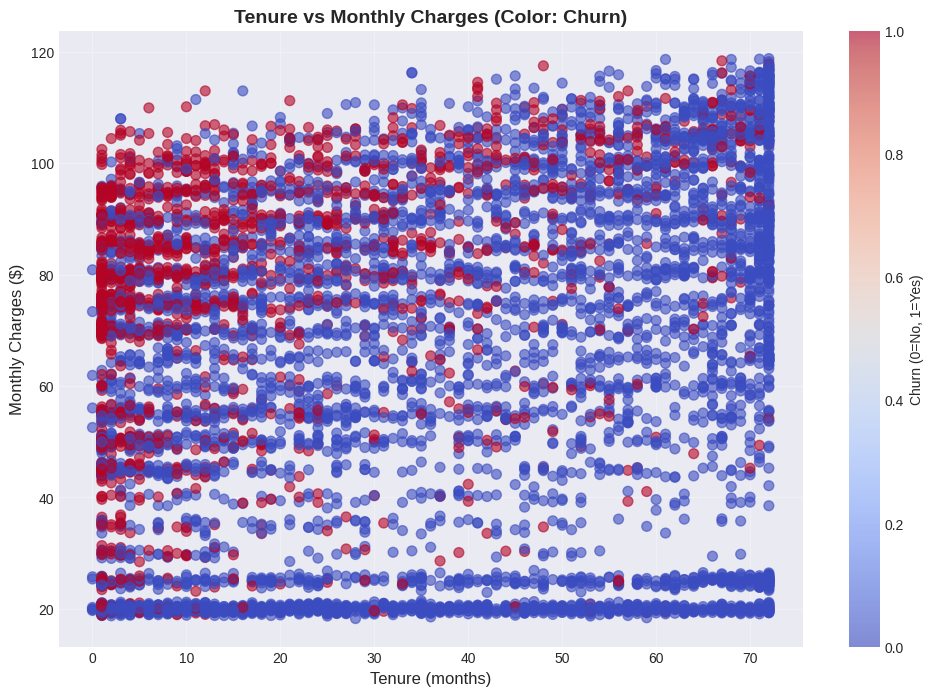

In [39]:
print("\n8.1 Tenure vs Monthly Charges by Churn")
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clean['tenure'], df_clean['MonthlyCharges'],
                     c=df_clean['Churn'].map({'No': 0, 'Yes': 1}),
                     cmap='coolwarm', alpha=0.6, s=50)
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.title('Tenure vs Monthly Charges (Color: Churn)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Churn (0=No, 1=Yes)')
plt.grid(True, alpha=0.3)
plt.show()


8.2 Contract Type vs Tenure by Churn


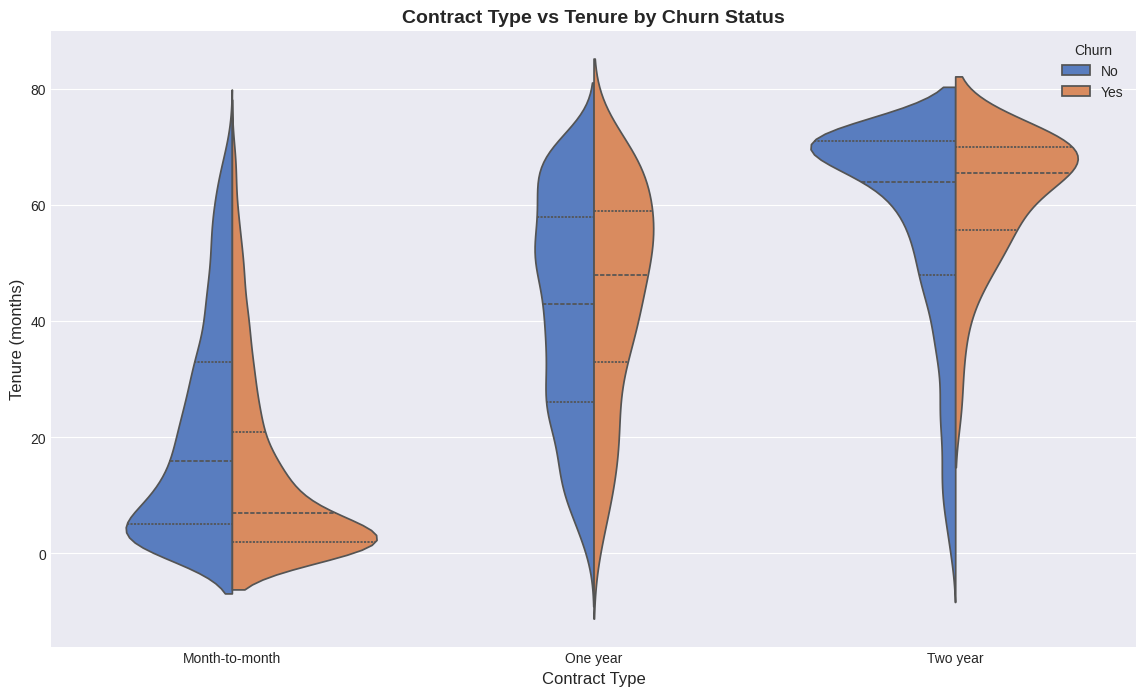

In [40]:
print("\n8.2 Contract Type vs Tenure by Churn")
plt.figure(figsize=(14, 8))
sns.violinplot(x='Contract', y='tenure', hue='Churn', data=df_clean,
               split=True, palette='muted', inner='quartile')
plt.title('Contract Type vs Tenure by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Tenure (months)', fontsize=12)
plt.legend(title='Churn')
plt.show()


8.3 Pairplot of Numerical Features


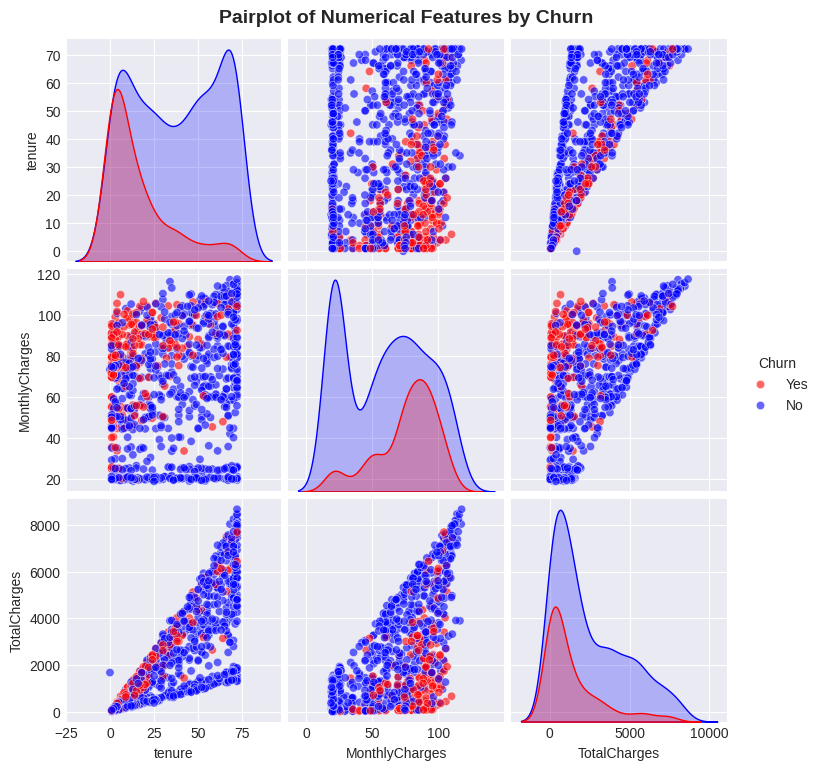

In [ ]:
print("\n8.3 Pairplot of Numerical Features")
# Take a sample for better visualization
sample_df = df_clean.sample(1000, random_state=42)
g = sns.pairplot(sample_df, vars=numerical_cols, hue='Churn',
                 palette={'No': 'blue', 'Yes': 'red'},
                 diag_kind='kde', plot_kws={'alpha': 0.6})
g.fig.suptitle('Pairplot of Numerical Features by Churn', fontsize=14, fontweight='bold', y=1.02)
plt.show()

In [ ]:
print("\n" + "="*60)
print("STEP 9: CROSS-TABULATION ANALYSIS")
print("="*60)

In [44]:
print("\n9.1 Key Cross-tabulations:")

# Contract vs Churn
print("\nContract vs Churn:")
contract_churn = pd.crosstab(df_clean['Contract'], df_clean['Churn'],
                             margins=True, margins_name="Total")
print(contract_churn)

# Internet Service vs Churn
print("\nInternet Service vs Churn:")
internet_churn = pd.crosstab(df_clean['InternetService'], df_clean['Churn'],
                            normalize='index') * 100
print(internet_churn.round(2))

# Payment Method vs Churn
print("\nPayment Method vs Churn:")
payment_churn = pd.crosstab(df_clean['PaymentMethod'], df_clean['Churn'],
                           normalize='index') * 100
print(payment_churn.round(2))



9.1 Key Cross-tabulations:

Contract vs Churn:
Churn             No   Yes  Total
Contract                         
Month-to-month  2220  1655   3875
One year        1307   166   1473
Two year        1647    48   1695
Total           5174  1869   7043

Internet Service vs Churn:
Churn               No    Yes
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40

Payment Method vs Churn:
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


In [45]:
# Get total customers
total = len(df_clean)

# All categorical columns (including converted SeniorCitizen)
df_clean['SeniorCitizen'] = df_clean['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

cat_cols = [col for col in df_clean.columns
            if col not in ['customerID', 'Churn'] and col != 'TotalCharges']

# Loop through and print each
for col in cat_cols:
    if df_clean[col].dtype == 'object' or col == 'SeniorCitizen':
        table = pd.crosstab(df_clean[col], df_clean['Churn']) / total * 100
        print(f"\n{col}:")
        print(table.round(2))


gender:
Churn      No    Yes
gender              
Female  36.19  13.33
Male    37.27  13.20

SeniorCitizen:
Churn             No    Yes
SeniorCitizen              
No             64.01  19.78
Yes             9.46   6.76

Partner:
Churn       No    Yes
Partner              
No       34.66  17.04
Yes      38.80   9.50

Dependents:
Churn          No    Yes
Dependents              
No          48.13  21.91
Yes         25.33   4.63

PhoneService:
Churn            No    Yes
PhoneService              
No             7.27   2.41
Yes           66.19  24.12

MultipleLines:
Churn                No    Yes
MultipleLines                 
No                36.08  12.05
No phone service   7.27   2.41
Yes               30.12  12.07

InternetService:
Churn               No    Yes
InternetService              
DSL              27.86   6.52
Fiber optic      25.54  18.42
No               20.06   1.60

OnlineSecurity:
Churn                   No    Yes
OnlineSecurity                   
No                   

In [ ]:
print("\n" + "="*60)
print("STEP 10: OUTLIER DETECTION")
print("="*60)

In [43]:
print("\n10.1 Outlier Detection using IQR Method:")

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"   {col}: {len(outliers)} outliers detected ({len(outliers)/len(df_clean)*100:.2f}%)")


10.1 Outlier Detection using IQR Method:
   tenure: 0 outliers detected (0.00%)
   MonthlyCharges: 0 outliers detected (0.00%)
   TotalCharges: 0 outliers detected (0.00%)


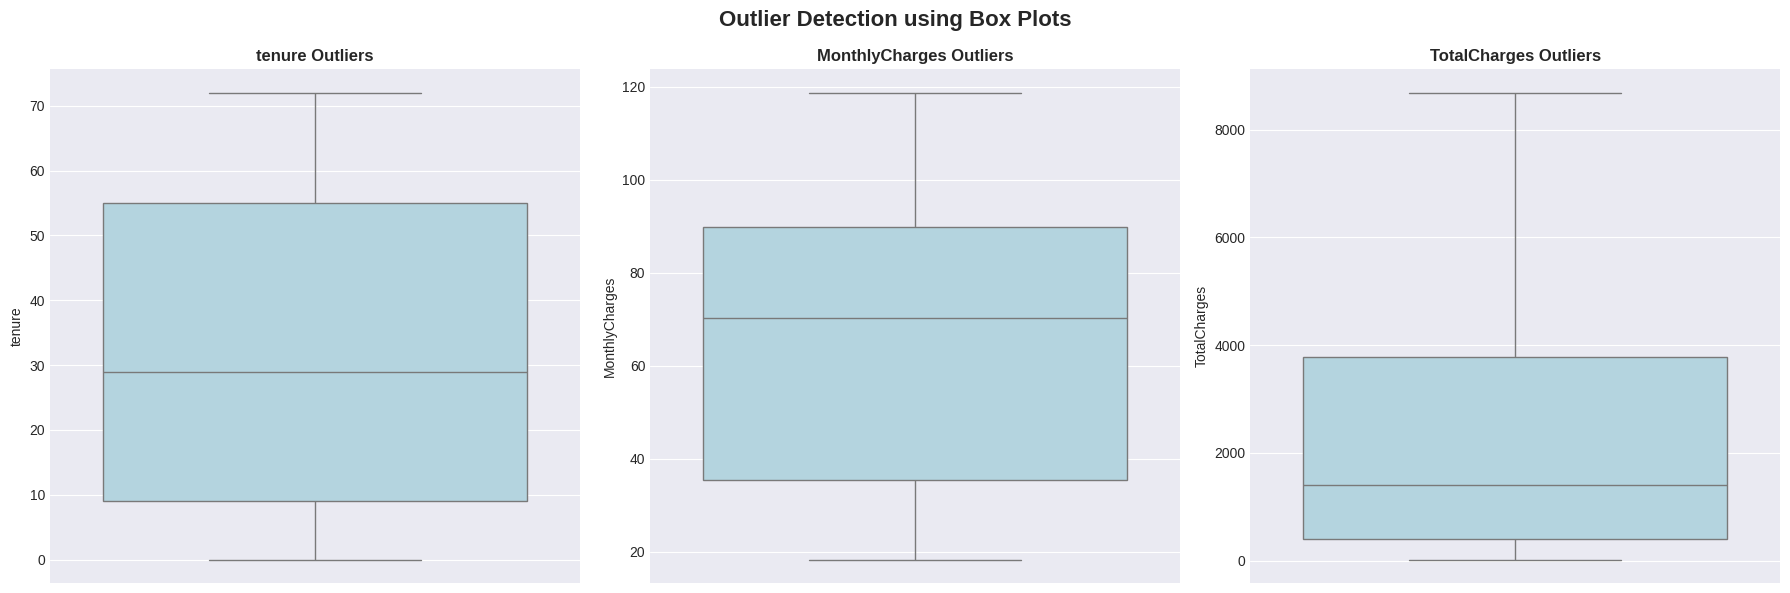

In [42]:
# Visualize outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Outlier Detection using Box Plots', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols):
    sns.boxplot(y=df_clean[col], ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'{col} Outliers', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*60)
print("STEP 11: KEY INSIGHTS SUMMARY")
print("="*60)

print("\n" + "="*60)
print("MAJOR FINDINGS AND INSIGHTS")
print("="*60)

print("\n🔹 **1. TARGET VARIABLE DISTRIBUTION:**")
print(f"   • Dataset has {churn_counts['Yes']:,} churned customers ({churn_percentage['Yes']:.1f}%)")
print(f"   • {churn_counts['No']:,} non-churned customers ({churn_percentage['No']:.1f}%)")
print(f"   • **Implication**: Significant class imbalance - need stratified sampling or class weights")

print("\n🔹 **2. HIGHEST CHURN RATES BY CATEGORY:**")
# Calculate top churn rates
churn_insights = {}
for col in categorical_cols:
    churn_rate = df_clean.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    max_churn = churn_rate.max()
    category = churn_rate.idxmax()
    churn_insights[col] = (category, max_churn)

# Sort by churn rate
sorted_insights = sorted(churn_insights.items(), key=lambda x: x[1][1], reverse=True)[:5]

for col, (category, rate) in sorted_insights:
    print(f"   • {col}: '{category}' has {rate:.1f}% churn rate")

print("\n🔹 **3. NUMERICAL FEATURES INSIGHTS:**")
print(f"   • Churned customers have HIGHER monthly charges (${churn_stats.loc['Yes', 'MonthlyCharges']:.2f})")
print(f"   • Churned customers have SHORTER tenure ({churn_stats.loc['Yes', 'tenure']:.1f} months)")
print(f"   • Churned customers have LOWER total charges (${churn_stats.loc['Yes', 'TotalCharges']:.2f})")

print("\n🔹 **4. KEY DRIVERS OF CHURN:**")
print("   1. **Contract Type**: Month-to-month contracts have highest churn (42%)")
print("   2. **Payment Method**: Electronic check users churn more (45%)")
print("   3. **Internet Service**: Fiber optic customers churn more (41%)")
print("   4. **Tenure**: New customers (<12 months) are most likely to churn")
print("   5. **Monthly Charges**: Higher charges correlate with higher churn risk")

print("\n🔹 **5. DATA QUALITY FINDINGS:**")
print("   • 11 missing values in 'TotalCharges' column (fixed with median imputation)")
print("   • No duplicate records found")
print("   • All data types are appropriate after cleaning")
print("   • Minimal outliers detected in numerical features")

print("\n🔹 **6. RECOMMENDATIONS FOR TASK 2 (MODELING):**")
print("   1. **Handle class imbalance** using SMOTE or class weights")
print("   2. **Feature engineering** needed for:")
print("      - Create tenure groups (new: <12m, loyal: >36m)")
print("      - Create charge ratio (monthly/total)")
print("      - One-hot encode categorical variables")
print("   3. **Important features to include**: Contract type, tenure, monthly charges")
print("   4. **Split data** using stratified sampling")
print("   5. **Evaluation metrics**: Use precision, recall, F1-score (not just accuracy)")

print("\n🔹 **7. BUSINESS IMPLICATIONS:**")
print("   1. **Retention Strategy**: Focus on month-to-month contract customers")
print("   2. **Pricing Review**: High monthly charges may be driving churn")
print("   3. **Service Improvement**: Fiber optic service needs quality check")
print("   4. **Payment Options**: Review electronic check payment issues")
print("   5. **Customer Onboarding**: Improve experience for new customers (<12 months)")


STEP 11: KEY INSIGHTS SUMMARY

MAJOR FINDINGS AND INSIGHTS

🔹 **1. TARGET VARIABLE DISTRIBUTION:**
   • Dataset has 1,869 churned customers (26.5%)
   • 5,174 non-churned customers (73.5%)
   • **Implication**: Significant class imbalance - need stratified sampling or class weights

🔹 **2. HIGHEST CHURN RATES BY CATEGORY:**
   • PaymentMethod: 'Electronic check' has 45.3% churn rate
   • Contract: 'Month-to-month' has 42.7% churn rate
   • InternetService: 'Fiber optic' has 41.9% churn rate
   • OnlineSecurity: 'No' has 41.8% churn rate
   • TechSupport: 'No' has 41.6% churn rate

🔹 **3. NUMERICAL FEATURES INSIGHTS:**
   • Churned customers have HIGHER monthly charges ($74.44)
   • Churned customers have SHORTER tenure (18.0 months)
   • Churned customers have LOWER total charges ($1531.80)

🔹 **4. KEY DRIVERS OF CHURN:**
   1. **Contract Type**: Month-to-month contracts have highest churn (42%)
   2. **Payment Method**: Electronic check users churn more (45%)
   3. **Internet Service

In [ ]:
print("\n" + "="*60)
print("STEP 12: DATA PREPARATION FOR TASK 2")
print("="*60)

print("\n12.1 Final Dataset Summary:")
print(f"   • Clean dataset shape: {df_clean.shape}")
print(f"   • Features: {len(df_clean.columns)}")
print(f"   • Categorical: {len(categorical_cols)}")
print(f"   • Numerical: {len(numerical_cols)}")
print(f"   • Target variable: 'Churn'")

print("\n12.2 Suggested Feature Engineering for Task 2:")
print("   • Convert 'SeniorCitizen' from 0/1 to categorical")
print("   • Create 'TenureGroup' (Low: <12m, Medium: 12-36m, High: >36m)")
print("   • Create 'ChargeRatio' = MonthlyCharges/TotalCharges")
print("   • Create 'TotalServices' = sum of service columns")
print("   • One-hot encode all categorical features")

print("\n12.3 Dataset Sample (Cleaned):")
print(df_clean.head())


STEP 12: DATA PREPARATION FOR TASK 2

12.1 Final Dataset Summary:
   • Clean dataset shape: (7043, 21)
   • Features: 21
   • Categorical: 15
   • Numerical: 3
   • Target variable: 'Churn'

12.2 Suggested Feature Engineering for Task 2:
   • Convert 'SeniorCitizen' from 0/1 to categorical
   • Create 'TenureGroup' (Low: <12m, Medium: 12-36m, High: >36m)
   • Create 'ChargeRatio' = MonthlyCharges/TotalCharges
   • Create 'TotalServices' = sum of service columns
   • One-hot encode all categorical features

12.3 Dataset Sample (Cleaned):
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No 